In [23]:
import matplotlib
print(matplotlib.__version__)

3.9.1


In [24]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Load the dataset
data = pd.read_csv("Loan_default.csv")
data.head(2)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


In [26]:
# Perform initial statistical analysis on numeric columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [27]:
# View data type of each column
data.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [28]:
# Check for nul values in each column
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

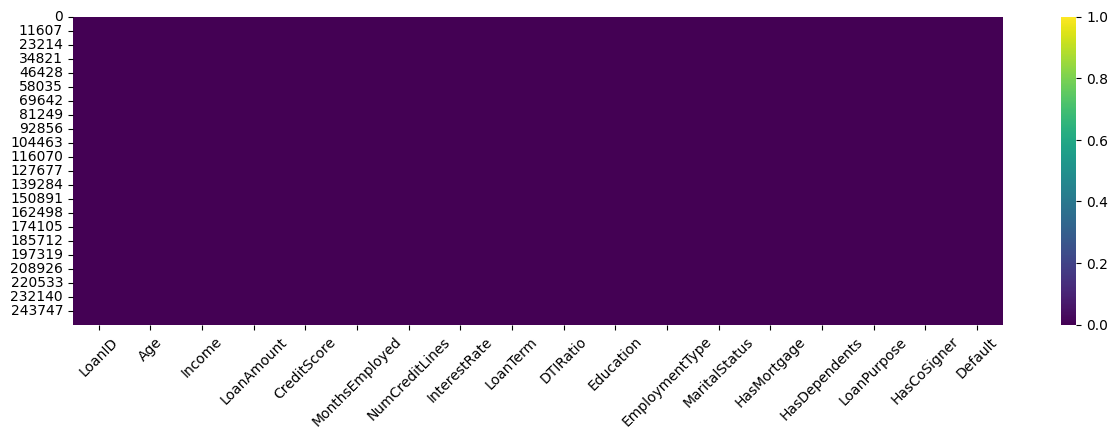

In [29]:
# Check for missing values using visualisations
plt.figure(figsize= (15,4))
sns.heatmap(data=data.isnull(), cmap="viridis", vmin=0, vmax=1)
plt.xticks(rotation = 45);

As shown, the data is free of null or missing values.

In [30]:
# Drop irrelevant columns/features
type(data)
data = data.drop("LoanID", axis=1)
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


##### Numerical data: Univariate analysis

In [31]:
# Create a new dataframe using numerical data only
numerical_df = data.select_dtypes(include= ["float64", "int64"])
print(numerical_df.head(2))
numerical_df["NumCreditLines"].unique() # view unique values of the "NumCreditLines" column

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   

   InterestRate  LoanTerm  DTIRatio  Default  
0         15.23        36      0.44        0  
1          4.81        60      0.68        0  


array([4, 1, 3, 2], dtype=int64)

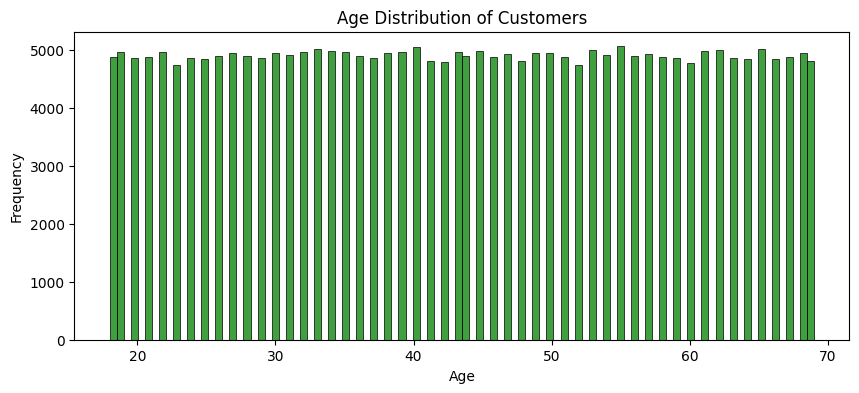

In [32]:
# Visualise the age distribution of the customers
plt.figure(figsize=(10,4))
sns.histplot(data=numerical_df["Age"], bins=100, color='green') # gives a uniform distribution
plt.title("Age Distribution of Customers")
plt.ylabel("Frequency");

As seen from the diagram above, the age distribution of the customers is roughly uniform.

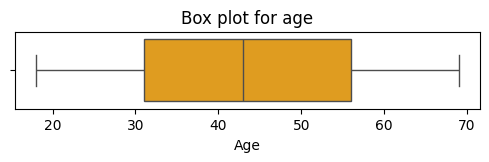

In [33]:
# Check for outliers in age column
plt.figure(figsize=(6, 1))
sns.boxplot(data=numerical_df["Age"], orient='h', color='orange')
plt.title("Box plot for age")
plt.xlabel("Age");

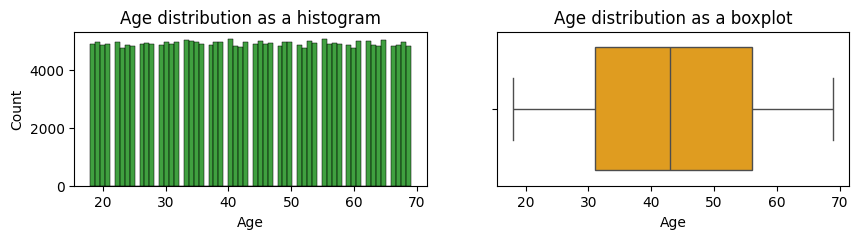

In [34]:
# Combine two plots into one visualisation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10, 2))
sns.histplot(data=numerical_df["Age"], ax=axes[0], color='green')
axes[0].set_title("Age distribution as a histogram")

sns.boxplot(data=numerical_df["Age"], orient='h', color='orange',ax=axes[1])
axes[1].set_title("Age distribution as a boxplot");

In [35]:
# View the column names in the numerical_df dataset
numerical_df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

**Distribution of numerical features**

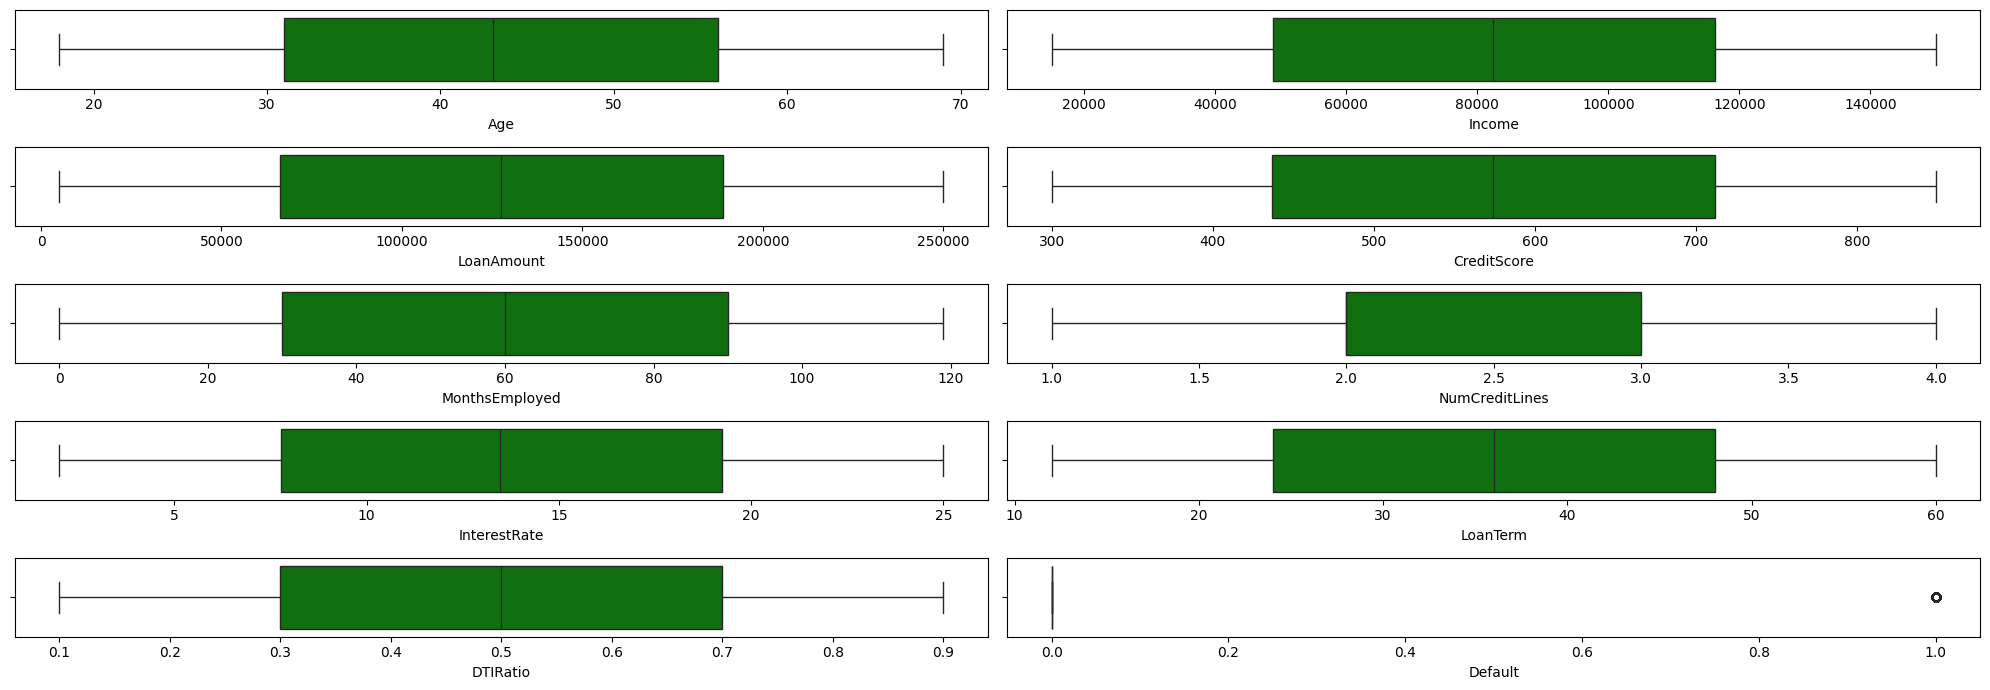

In [36]:
num_cols = numerical_df.columns.to_list() # to save the column names in a list
n_features = len(num_cols) # number of features in the dataset
nc = (n_features + 1)//2 # the '//2' gives the whole number portion of the division by 2

fig, axes = plt.subplots(nrows=nc, ncols=2, figsize = (20,7))
position = axes.flatten() # to make it a single row of subplots

for index, feature in enumerate(num_cols): # to bring out the element and its index
    sns.boxplot(data= numerical_df[feature], ax=position[index], orient = 'h', color='green')

plt.tight_layout() # to evenly distribute the plots

From the visualisation above, none of the columns contain outliers and indicate that they may be uniformuly distributed given the position of the median (50th percentile) with respect to the minimum and maximum values.

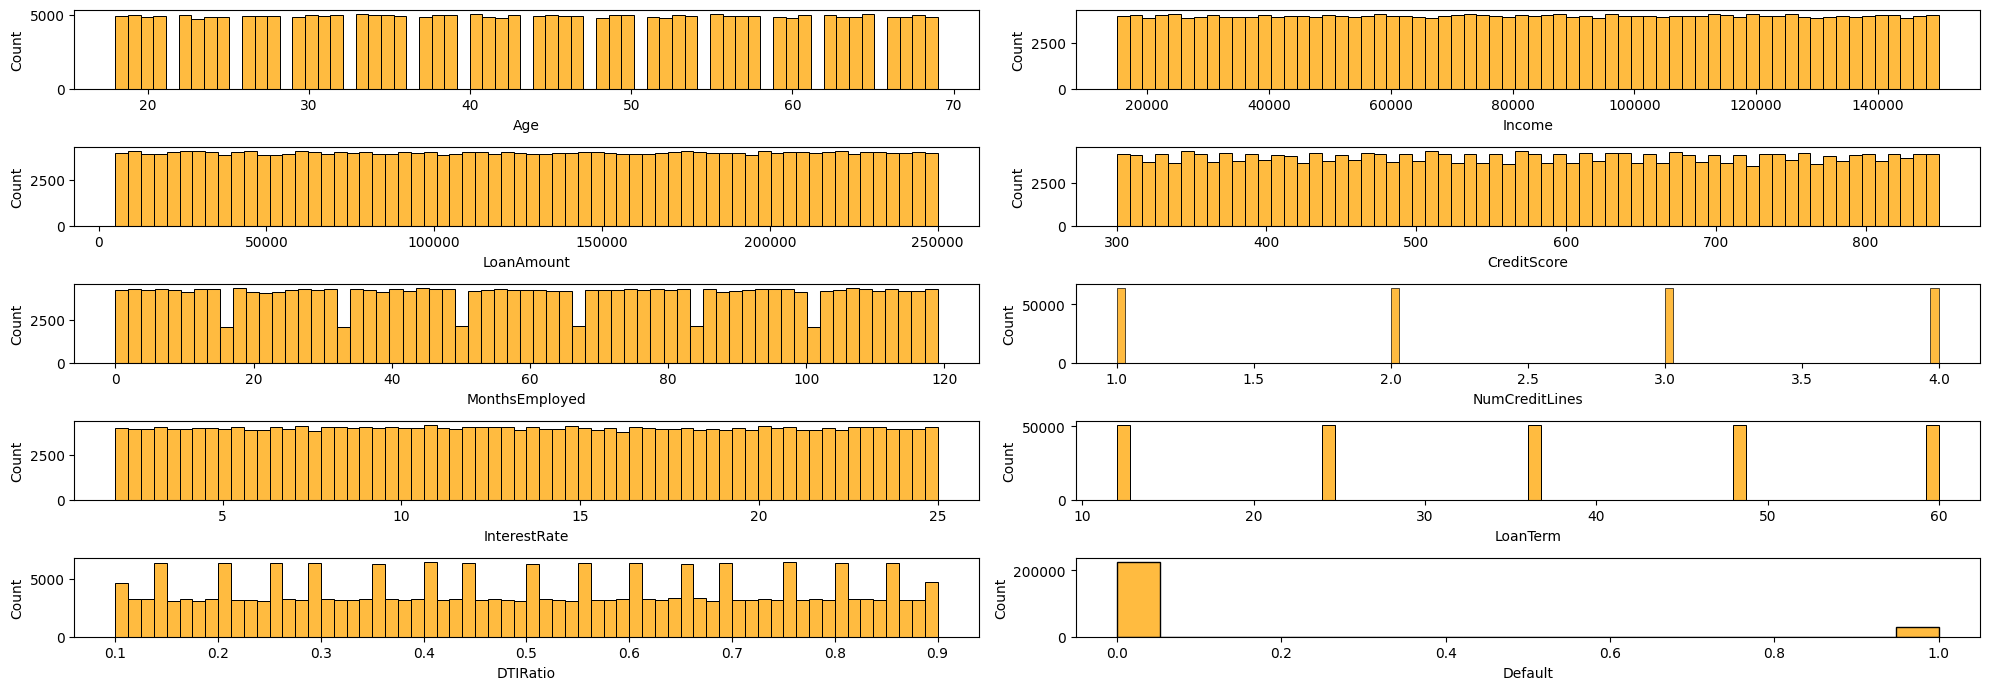

In [37]:
fig, axes = plt.subplots(nrows=nc, ncols=2, figsize = (20,7))
position = axes.flatten() # to make it a single row of subplots

for index, feature in enumerate(num_cols): # to bring out the element and its index
    sns.histplot(data= numerical_df[feature], ax=position[index], color='orange')

plt.tight_layout() # to evenly distribute the plots

As seen in the box plots, the numerical columns data are largely uniformly distributed and only a small percentage of the customers default on their loans.

##### Bivariate Analysis: To compare two variables against each other

In [38]:
numerical_df.corr() # creating the correlation matrix for the numerical_df dataset

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


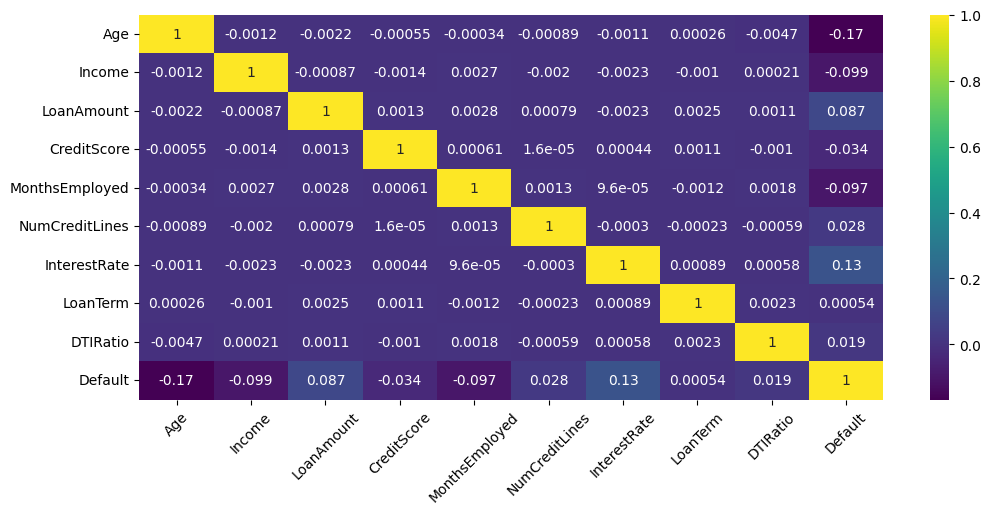

In [39]:
# Visualising the correlation matrix between variables as a heatmap
my_mask = np.triu(np.ones_like(numerical_df.corr(), dtype=bool)) # to overwrite the upper part of the correlation heatmap with blanks
plt.figure(figsize=(12, 5))
sns.heatmap(data=numerical_df.corr(), annot=True, cmap="viridis")#, mask=my_mask) # .corr() shows linear correlation only
plt.xticks(rotation = 45);

From the correlation matix, age and interest rate of the loan seem to have the highest correlation effect on the tendency for the customer to default.

In [63]:
# Create an age bracket category to see rates of defaults for different age groups
print(max(data['Age']), min(data['Age']))

def age_bracket(age):
    if age <= 30:
        return "Young Adult (<=30)"
    elif age <= 45:
        return "Middle Age (31-45)"
    elif age <= 60:
        return "Older Adult (46-60)"
    else:
        return "Elderly (>60)"

data["Age_bracket"] = data['Age'].apply(age_bracket)

# Add column with Default as 'Yes' or 'No'
def defaults(defa):
    if defa == 0:
        return "No"
    else:
        return "Yes"

data["Def_Status"] = data['Default'].apply(defaults)

data.head(2)

69 18


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Age_bracket,Def_Status
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Older Adult (46-60),No
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Elderly (>60),No


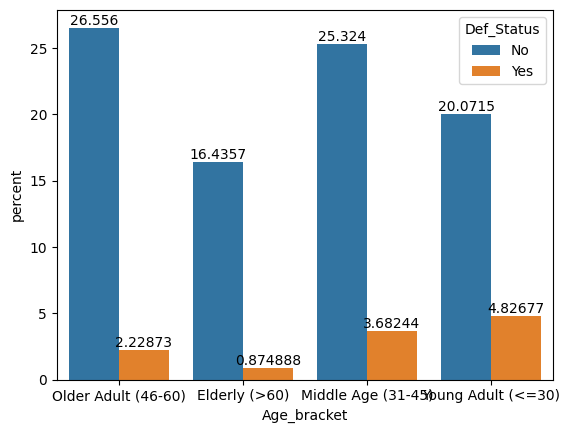

In [67]:
ax = sns.countplot(data=data, x="Age_bracket", hue=data["Def_Status"], stat='percent')
for container in ax.containers:
    ax.bar_label(container)

Shows that young adults less than 30 years are most likely to default in paying their loans. And customers under 45 years account for about 70% of loan defaulters.

##### Categorical data

In [68]:
# Creating a new dataframe with only the categorical variables
categorical_df = data.select_dtypes(include="object")
categorical_df.head(2)

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Age_bracket,Def_Status
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,Older Adult (46-60),No
1,Master's,Full-time,Married,No,No,Other,Yes,Elderly (>60),No


In [69]:
cat_cols = categorical_df.columns.to_list() # to save as a list
for feature in cat_cols:
    print(f"{feature} >>> {data[feature].nunique()} : {data[feature].unique()}")

Education >>> 4 : ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType >>> 4 : ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus >>> 3 : ['Divorced' 'Married' 'Single']
HasMortgage >>> 2 : ['Yes' 'No']
HasDependents >>> 2 : ['Yes' 'No']
LoanPurpose >>> 5 : ['Other' 'Auto' 'Business' 'Home' 'Education']
HasCoSigner >>> 2 : ['Yes' 'No']
Age_bracket >>> 4 : ['Older Adult (46-60)' 'Elderly (>60)' 'Middle Age (31-45)'
 'Young Adult (<=30)']
Def_Status >>> 2 : ['No' 'Yes']


##### Univariate analysis

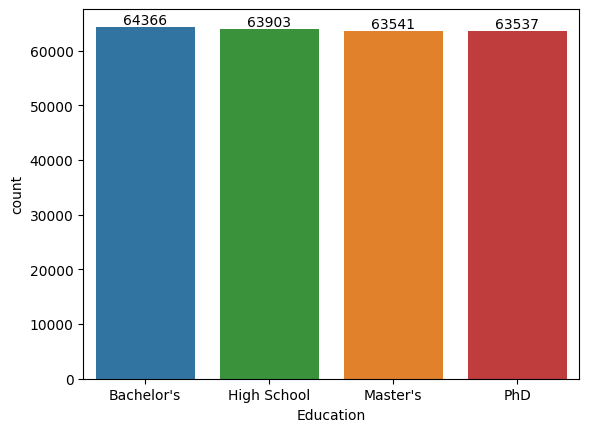

In [70]:
# To view the distribution of the Education categories
ax = sns.countplot(data=categorical_df, x="Education", hue="Education", legend=False, 
                   order=categorical_df['Education'].value_counts(ascending=False).index)
values = categorical_df["Education"].value_counts(ascending=False).values
# ax.bar_label(container=ax.containers[0], labels=values, fontsize=10);

for container in ax.containers:
    ax.bar_label(container)
# ax.bar_label(ax.containers[0])

In [71]:
ed_count = data["Education"].value_counts() # showing the number of customers per education sub-category
print(ed_count)
categorical_df.head(2)

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64


,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Age_bracket,Def_Status
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,Older Adult (46-60),No
1,Master's,Full-time,Married,No,No,Other,Yes,Elderly (>60),No


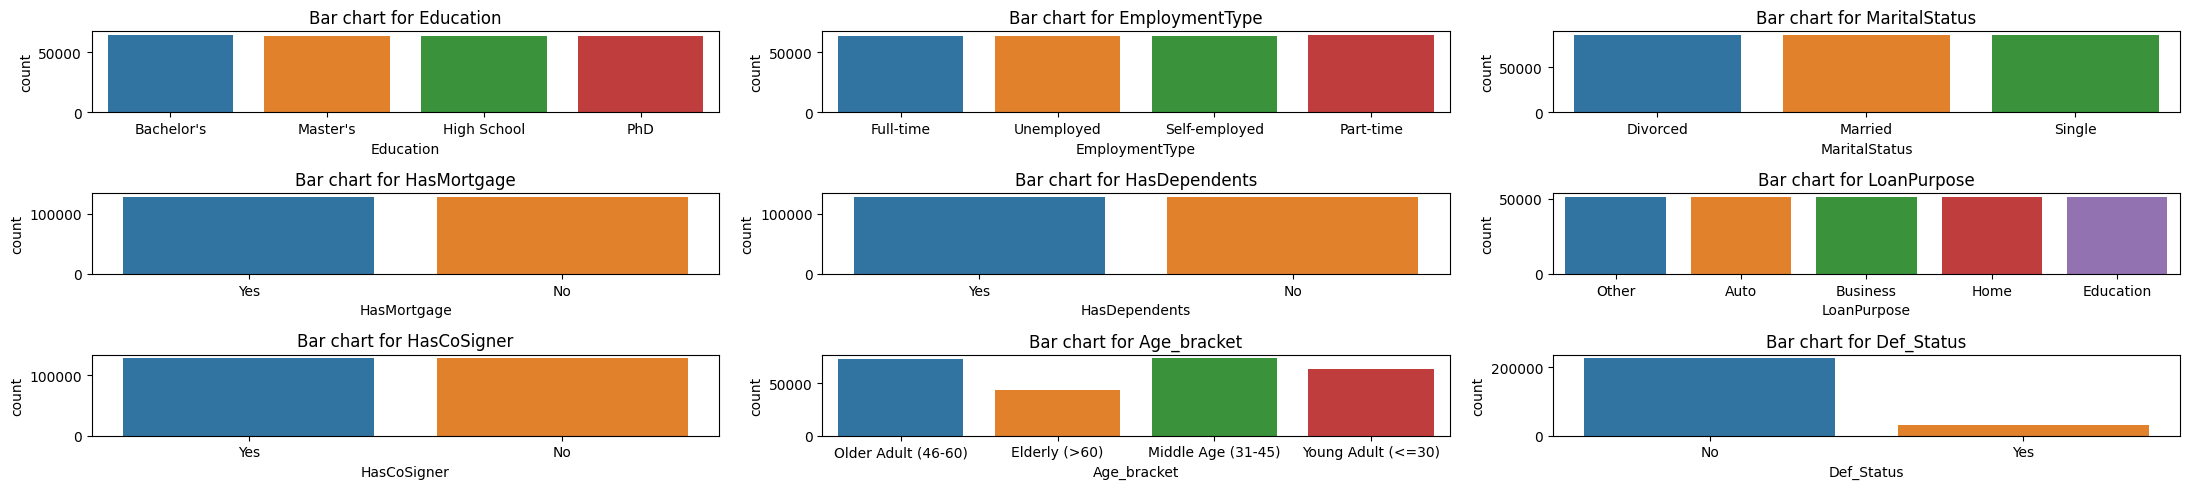

In [73]:
# To view all the distribution of the categorical variables in one figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (22, 5))
position = axes.flatten()

for index, feature in enumerate(cat_cols):
    sns.countplot(data=categorical_df, x=feature, ax=position[index], hue= feature, legend=False)
    position[index].set_title(f"Bar chart for {feature}")

plt.tight_layout()

##### Bivariate Analysis

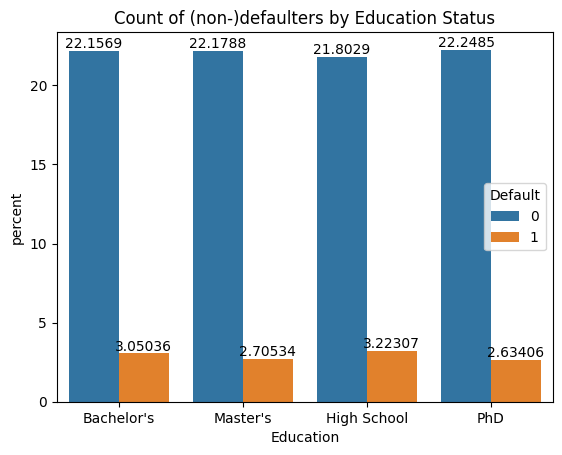

In [76]:
ax = sns.countplot(data=categorical_df, x="Education", hue=data["Default"], stat='percent')
plt.title("Count of (non-)defaulters by Education Status")
for container in ax.containers:
    ax.bar_label(container)

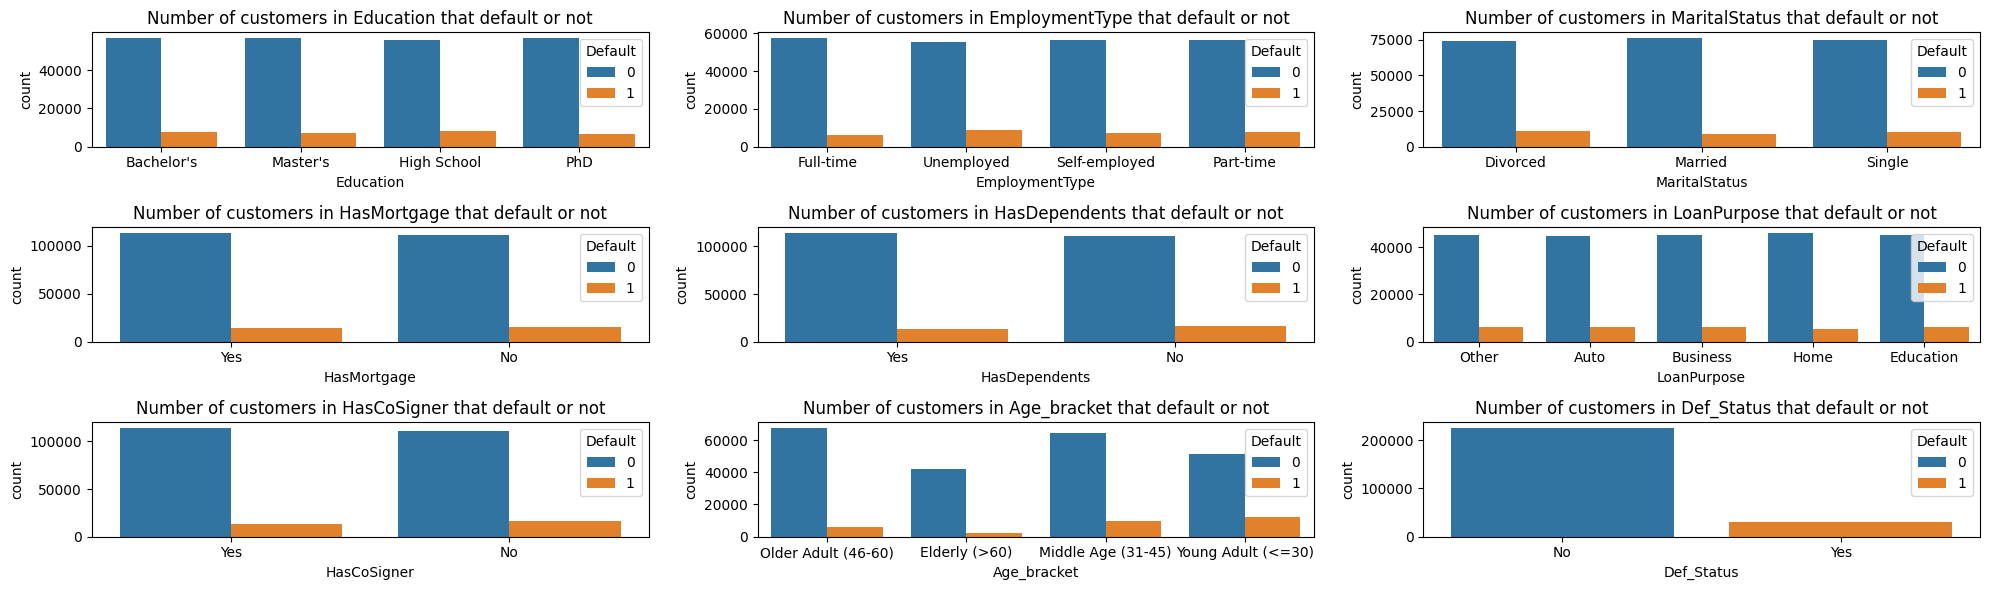

In [75]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (20, 6))
position = axes.flatten()

for index, feature in enumerate(cat_cols):
    sns.countplot(data = categorical_df, x = feature, hue=data["Default"], ax=position[index])
    position[index].set_title(f"Number of customers in {feature} that default or not")

plt.tight_layout()

It would appear that level of Education, Employment status, Marital Status, with or without a mortgage, and Loan Purpose, have little bearing on whether a customer defaults or not. The main key drivers seem to be their age bracket, followed by if they have dependents or co-signers.